In [2]:
#Description: This program attempts to doing a predictive analysis of the Churn_Modelling Dataset

In [28]:
#Import pandas and os library in Jupyter Notebook environment:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [29]:
#Collect the Data
ds1 = pd.read_csv(r"C:\Users\hp\Desktop\Datasets\Churn_Modelling.csv")
ds1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
#Clean the Data
ds1 = ds1.dropna()

#Look at the Data
ds1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [31]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [42]:
#Data Preparation
xVars = ds1.drop('EstimatedSalary', axis = 1)
yVars = ds1[['EstimatedSalary']]
x_train, xValid, y_train, yValid = train_test_split(xVars, yVars, test_size = 0.3, random_state = 42)

In [43]:
print(xTrain.shape)
print(ds1.shape)

(7000, 13)
(10000, 14)


In [44]:
#Model Random Forest Regression
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [ ]:
#Check Output
y_pred = regressor.predict(xValid)

In [64]:
y_pred

array([642.764, 650.841, 652.444, ..., 637.473, 628.817, 665.493])

In [65]:
y_pred = pd.DataFrame(y_pred, columns = ['yPredict'])

In [66]:
y_pred

,yPredict
0,642.764
1,650.841
2,652.444
3,662.843
4,692.376
...,...
2995,667.417
2996,652.798
2997,637.473
2998,628.817


In [67]:
yValid

,CreditScore
6252,596
4684,623
1731,601
4742,506
4521,560
...,...
8014,731
1074,535
3063,609
6487,580


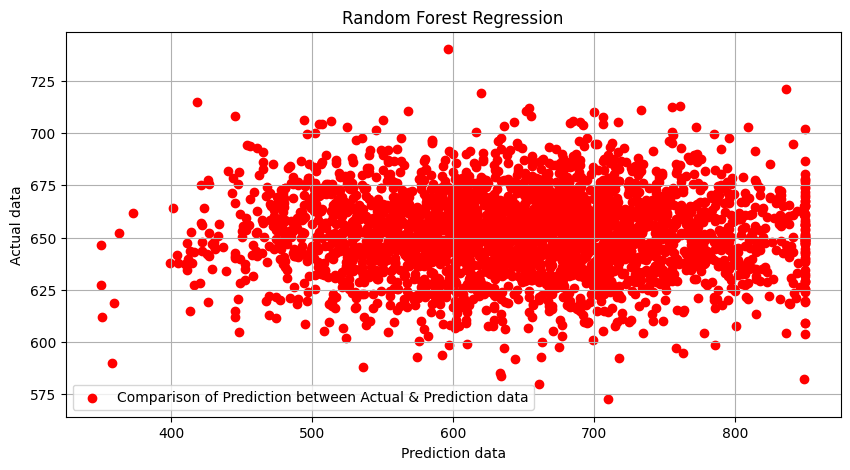

In [68]:
#Scatter Plot 
plt.figure(figsize= (10, 5))
plt.scatter(yValid, y_pred, color = 'red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Prediction data')
plt.ylabel('Actual data')
plt.show()

In [69]:
#R Square
metrics.r2_score(yValid, y_pred)

-0.04740558074664136